In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Data Loading and Oversampling

In [3]:
data = pd.read_csv('preprocessed.csv', index_col=0)
data.head(5)

,merchant,category,amt,gender,street,city,zip,city_pop,job,merch_lat,merch_long,hour,age,is_fraud
0,1.519014,1.615782,-0.407826,-0.909206,-0.207491,-0.232599,-0.209999,-0.282589,-0.316898,-0.494354,0.593864,-1.878145,-0.872823,0
1,0.900957,1.548622,0.230039,-0.909206,-0.207491,-0.232599,-0.209999,-0.293670,-0.281569,2.078699,-2.030341,-1.878145,-0.314203,0
2,-0.667123,-0.616973,0.934149,1.099861,-0.207491,-0.232599,-0.209999,-0.280406,0.744516,0.902849,-1.592323,-1.878145,0.629736,0
3,-0.426116,-0.204031,-0.158132,1.099861,1.005067,1.135357,1.018859,-0.287742,0.155359,1.662886,-1.621848,-1.878145,0.343422,0
4,-0.367463,-0.493928,-0.177094,1.099861,-0.207491,-0.232599,-0.209999,-0.293835,-0.369541,0.026941,0.841909,-1.878145,-0.760752,0


In [4]:
# Straitified Train-Test split
y = data['is_fraud'].values
X = data.drop(columns=['is_fraud'], inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=100, stratify=y)
print(f"% of positive in train data: {y_train[np.where(y_train==1)].shape[0]/y_train.shape[0]*100}")
print(f"% of positive in test data: {y_test[np.where(y_test==1)].shape[0]/y_test.shape[0]*100}")


% of positive in train data: 0.5788434588706052
% of positive in test data: 0.5789158438366799


In [6]:
# Train Data Oversampling
sm = SMOTE(random_state=100)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)
print(f"% of positive in train data: {y_train[np.where(y_train==1)].shape[0]/y_train.shape[0]*100}")

(1804836, 13) (1804836,)
% of positive in train data: 50.0


## LogisticRegression, SVC and RandomForest Experiment (metric used: FPR, FNR, F1)

In [16]:
def ml_model(model_name):
    if model_name == 'LR':
        model = LogisticRegression(C=10.0)
        model.fit(X_train, y_train)
    elif model_name == 'SVC':
        model = SVC(C=1.0)
        model.fit(X_train, y_train)
    elif model_name == 'RF':
        model = RandomForestClassifier(verbose=3, n_jobs=-1)
        model.fit(X_train, y_train)
    y_pred_train, y_pred_train_score = model.predict(X_train), model.predict_proba(X_train)[:,1]
    y_pred_test, y_pred_test_score = model.predict(X_test), model.predict_proba(X_test)[:,1]
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    print(f"Train f1:  {f1_train}")
    print(f"Test f1:  {f1_test}")
    print("Train and Test confusion matrix:\n")
    for cm in [cm_train, cm_test]:
        disp = ConfusionMatrixDisplay(cm)
        disp.plot()
        plt.show()

Train f1:  0.8530800420838603
Test f1:  0.10909861885146596
Train and Test confusion matrix:



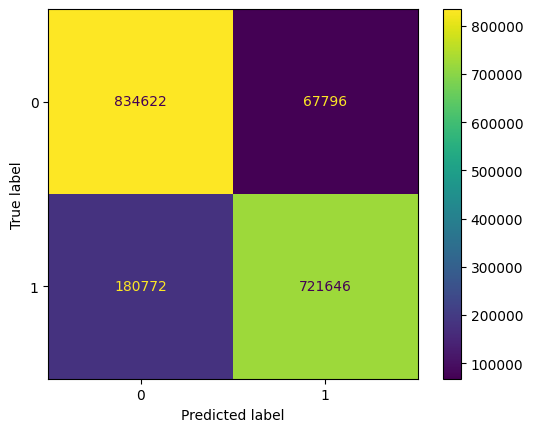

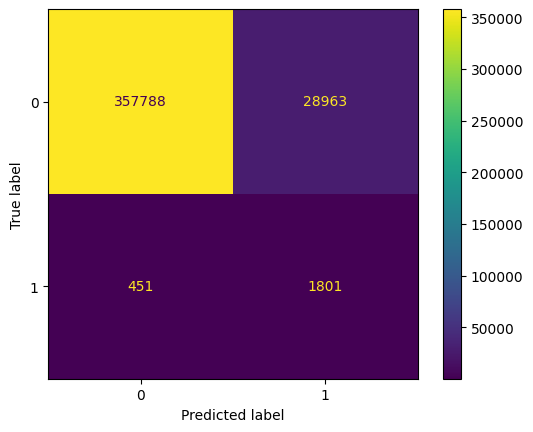

In [83]:
ml_model('LR')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    9.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    9.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished


Train f1:  1.0
Test f1:  0.8449100432703257
Train and Test confusion matrix:



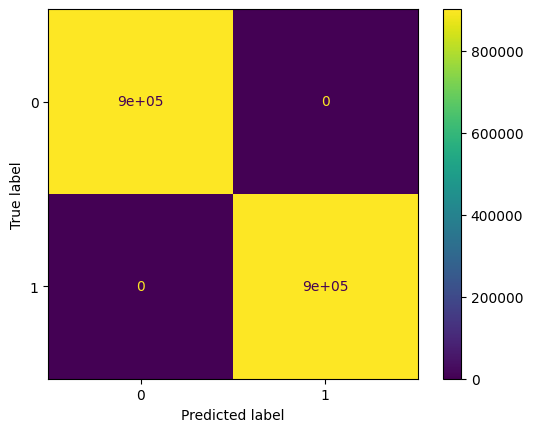

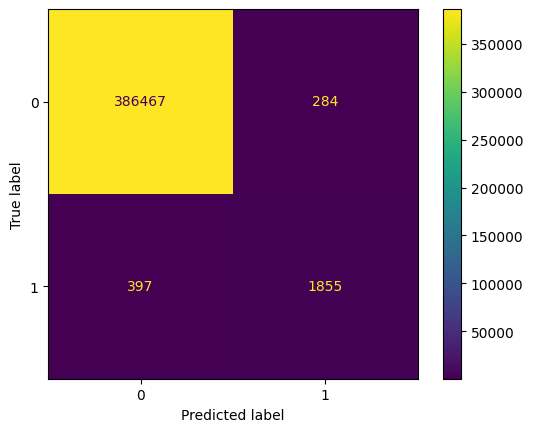

In [18]:
ml_model('RF')